In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cabriggs/dodgers-admission-revenue/master/dodgers.csv')

In [3]:
df.to_csv('dodgers.csv')

In [4]:
df.head()

,Unnamed: 0,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


We have a dataset showing attendance numbers and several other properties of each game day. As an alayst working for the Dodgers, presumably my aim is to increase profits which means increasing attendance in a cost-effective way. Let's see what correlates with attendance.

There are some categorical variables here. For categories with hierarchical levels, and in particular for any categorical variable with only two outcomes, it makes sense to convert to numerical. We can then compute correlations.

In [5]:
def bincat_to_bin(word,zero='no',one='yes'):
# Accepts: a variable outcome to change to 0 or 1
#          optional categorical arguments
# Returns: 0 or 1
    if word.strip().lower()==zero:
        return(0)
    elif word.strip().lower()==one:
        return(1)

In [6]:
# The variables and their outcomes to be converted to binary
bin_cats = {'skies':['cloudy','clear'],
            'day_night':['day','night'],
            'cap':['no','yes'],
            'shirt':['no','yes'],
            'fireworks':['no','yes'],
            'bobblehead':['no','yes']}

In [7]:
# converting select columns to binary
for col in bin_cats.keys():
    df[col+'_bin']=df[col].apply(bincat_to_bin,
                                 args=(bin_cats[col][0],bin_cats[col][1]))

In [8]:
df.head()

,Unnamed: 0,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,skies_bin,day_night_bin,cap_bin,shirt_bin,fireworks_bin,bobblehead_bin
0,0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,1,0,0,0,0,0
1,1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0
2,2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0
3,3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,0,1,0,0,1,0
4,4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0


In [9]:
# show the correlation matrix
df.corr()

,Unnamed: 0,day,attend,temp,skies_bin,day_night_bin,cap_bin,shirt_bin,fireworks_bin,bobblehead_bin
Unnamed: 0,1.000000,-0.155981,0.057033,0.821758,0.152029,-0.013593,0.051039,-0.027960,-0.013965,-0.007707
day,-0.155981,1.000000,0.027093,-0.127612,0.038396,-0.039828,-0.202274,-0.030182,0.099528,0.145363
attend,0.057033,0.027093,1.000000,0.098951,0.150963,-0.043544,-0.055002,0.133269,0.002094,0.581895
temp,0.821758,-0.127612,0.098951,1.000000,0.316584,-0.272141,0.064521,0.004394,-0.189899,0.049573
skies_bin,0.152029,0.038396,0.150963,0.316584,1.000000,-0.188903,-0.099671,0.108566,0.021880,0.049349
day_night_bin,-0.013593,-0.039828,-0.043544,-0.272141,-0.188903,1.000000,-0.128951,-0.074796,0.217922,0.188982
cap_bin,0.051039,-0.202274,-0.055002,0.064521,-0.099671,-0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt_bin,-0.027960,-0.030182,0.133269,0.004394,0.108566,-0.074796,-0.031204,1.000000,-0.089648,-0.077743
fireworks_bin,-0.013965,0.099528,0.002094,-0.189899,0.021880,0.217922,-0.072732,-0.089648,1.000000,-0.181207
bobblehead_bin,-0.007707,0.145363,0.581895,0.049573,0.049349,0.188982,-0.063074,-0.077743,-0.181207,1.000000


The variable most strikingly correlated with attendance is whether a bobblehead was given. Strictly from this data the causality is not clear: it may be that bobbleheads were given on special nights (e.g. final game of a series) and that resulted in higher attendance.

People may be getting cold. There's a positive correlation between temperature and attendance.

98.71542724060386 0.3794693886882514


/home/lillian/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


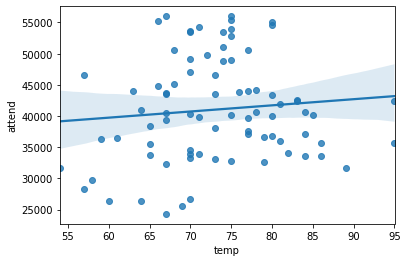

In [10]:
# plot attend vs temp with regression line and confidence interval
sns.regplot(df['temp'],df['attend'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['temp'],df['attend'])
# slope represents marginal tickets sold per degree F increase
print(slope, p_value)

On second thought, the p_value is insignificant. Let's move on.

Predictably, attendance will be higher on weekends than weekdays. Everyone knows this, and some things can't be helped. Let's examine attendance by day of the week.

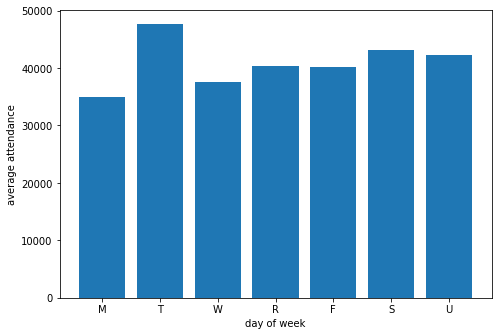

In [11]:
# plotting average attendance by day of week - expecting peaks on weekends
days={'M':'Monday','T':'Tuesday','W':'Wednesday','R':'Thursday',
      'F':'Friday','S':'Saturday','U':'Sunday'}
attend_by_day = []
for day in days.keys():
    attend_by_day.append(df[df['day_of_week']==days[day]].attend.mean())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = days.keys()
ax.bar(x,attend_by_day)
ax.set_xlabel('day of week')
ax.set_ylabel('average attendance')
plt.show()

OK - I was wrong. Tuesday is the most popular day to go see the Dodgers. This can't be organic. There must be a promotion already in play to increase Tuesday attendance. Let's see if one of the perks in our dataset (cap, shirt, fireworks, bobblehead) disproportionately falls on Tuesdays.

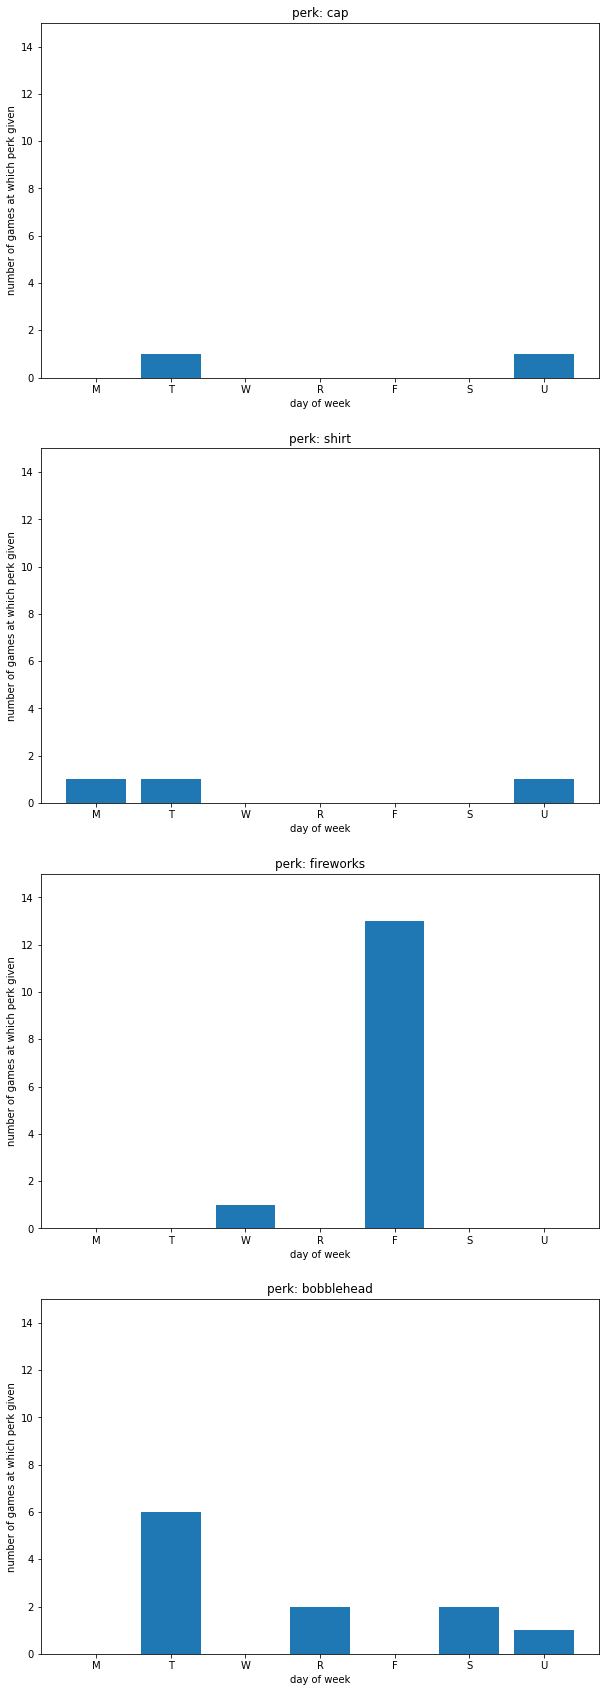

In [12]:
# for each perk, graphings its distribution over the days of the week
fig, axs = plt.subplots(4,figsize=(10,30))
plot_coords = [(0,0),(0,1),(1,0),(1,1)]
perks = ['cap','shirt','fireworks','bobblehead']
count = 0
for perk in perks:
    ys=[]
    for day in days.keys():
        df_ = df[df['day_of_week']==days[day]]
        ys.append(len(df_[df_[perk]==bin_cats[perk][1].upper()]))
    axs[count].set_title(f'perk: {perk}')
    axs[count].bar(days.keys(),ys)
    axs[count].set_xlabel('day of week')
    axs[count].set_ylabel('number of games at which perk given')
    axs[count].set_ylim(0,15)
    count+=1

It's bobbleheads, then. Based on the provided data, it appears that handing out bobbleheads is promoting Tuesday attendance. If bobbleheads were given on otherwise unspecial Tuesday nights, I suggest more bobblehead nights. If not, I suggest testing by giving them on random nights to see if the positive correlation with attendance holds.

Two caveats here: first, people like to establish routines. Perhaps there are "Tuesday regulars" attending games. In a future season consider switching bobbleheads to Wednesdays and see if the effect holds. Second: [google tells me](https://dodgerblue.com/los-angeles-dodgers-2020-promotional-and-giveaways-schedule-bobblehead-dates-friday-night-fireworks-more-details/) this was probably a "collect them all" type promotion - very clever. It may be that the promotion did not increase attendance but simply shifted it. We would need data from previous years to get an idea.

Clear skies correlate with higher attendance, but neither can we change the weather nor can we predict it very far in advance. This may also be an artifact of the weather in Los Angeles. Clear skies are more common in the summer, and attendance is probably higher in summer regardless of weather due to schools being out and families taking R&R.
![LA cloudy days by season](la_clouds.png)

There is a positive correlation with temperature and attendance. But does it hold up month-by-month? Southern California gets uncomfortably hot in late summer and early fall.

In [13]:
# checking which months are present
df.month.unique()

array(['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], dtype=object)

In [14]:
# ordering the months
months = ['APR','MAY','JUN','JUL','AUG','SEP','OCT']
print('Month   marginal tickets/deg   probability')
print('-----   --------------------   -----------')
for month in months:
    x = df[df['month'] == month]['temp']
    y = df[df['month'] == month]['attend']
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print(f'{month:>4} {round(slope):16} {" "*10}{round(p_value,3)}')

Month   marginal tickets/deg   probability
-----   --------------------   -----------
 APR             1170           0.022
 MAY              337           0.412
 JUN               55           0.902
 JUL              552           0.487
 AUG             -105           0.826
 SEP             -296           0.25
 OCT             -756           0.796


I expect the moderate positive effect of temperature on attendance April-July has to do with warmer temperatures indicating closer to summer, deeper in summer vacation, and/or more exciting games later in the season. The negative correlation between temperature and attendance in the later months warrants closer inspection.

One might think that temperatures are cooling down from August to October, but it's not the case in LA. They are still warming up.

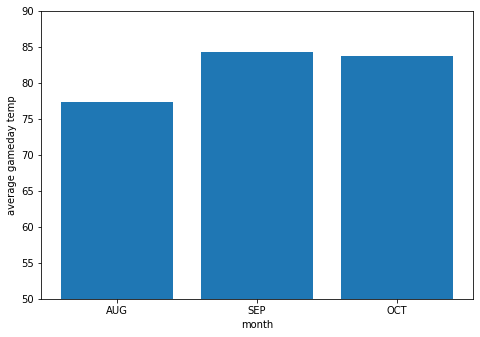

In [15]:
# graphing average temperature on game nights by month of hot months
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = months[4:]
temps = [df[df['month']==month].temp.mean() for month in x]
ax.bar(x,temps)
ax.set_xlabel('month')
ax.set_ylabel('average gameday temp')
# 0 isn't particularly meaningful for degrees F, so I set ymin to LA's absolute 0.
plt.ylim(50,90)
plt.show()

October is fully out of summer break, so distance from summer freedom inhibiting attendance doesn't explain the drop in sales per degree increase in temperature. A reasonable alternate explanation based on this limited data is that the heat supresses attendance.

### Summary
Unless bobbleheads were strategically given out on days of already predictably high attendance, it can be inferred that giving bobbleheads is likely to significantly increase attendance on a given day. Without testing, we cannot deduce the effect on other-day attendance. However it is common practice across industries to use promotions to boost sales on the lowest-sales days, so it's reasonable to assume the same strategy is optimal here to maximize overall attendance. Attendance is likely depressed during the hottest months (August, September, October) by high temperatures.

### Recommended actions
Give out more bobbleheads. Reserve bonuses (e.g. rare elements of the collectible set) for days with poorer (too hot or cold) weather. Take measures to associate the stadium with "cool." Put "cool" in your summer advertising and use cool colors (fortunately the Dodgers color is blue). Install misters, air movers, and temporary shade structures. See that cold treats are being effectively served and advertised at the stadium during hot months. But above all, 81 records is not much to go off of when making big-money decisions about on MLB stadium. The most cost-effective way to improve decision making here would be to gather more data.